In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('missing_imputation_value.csv')

In [4]:
df.sample(5)

,society,price,price_persqft,bedRoom,bathroom,balcony,floorNum,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
270,unitech vistas,0.53,4800.0,2.0,2.0,2,9.0,Relatively New,sector 70,flat,876.00,0,0,0,0,1,2,24
478,indiabulls enigma,3.40,10000.0,4.0,5.0,3,10.0,Relatively New,sector 110,flat,2800.00,0,1,0,0,0,2,152
2859,indepedent,3.40,12938.0,9.0,9.0,3,3.0,Moderately Old,sector 9,house,2626.00,0,0,0,0,0,0,61
3088,indepedent,1.40,8235.0,2.0,2.0,1,3.0,Relatively New,pratap nagar,house,1700.08,0,0,0,0,0,2,0
2985,indepedent,0.80,6666.0,8.0,8.0,2,1.0,Relatively New,sector 1,house,1195.00,0,0,0,0,0,2,0


In [5]:
train_df=df.drop(columns=['price_persqft','society'],axis=1)

In [6]:
train_df.sample(5)

,price,bedRoom,bathroom,balcony,floorNum,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1818,2.24,3.0,3.0,3,2.0,Relatively New,sector 65,flat,1650.0,1,1,0,0,0,2,46
422,3.50,3.0,4.0,3,17.0,Relatively New,sector 67,flat,2050.0,0,1,1,0,0,0,167
2603,0.70,2.0,2.0,3,9.0,New Property,sector 90,flat,1081.6,1,0,0,0,0,2,60
3093,5.70,9.0,9.0,3+,3.0,Moderately Old,sector 2,house,2432.0,0,0,0,1,0,0,0
3201,0.40,2.0,2.0,1,1.0,Relatively New,sector 2,house,525.0,0,0,0,0,0,2,0


# --------------------------------------------------

In [7]:
train_df.shape

(3709, 16)

<Axes: >

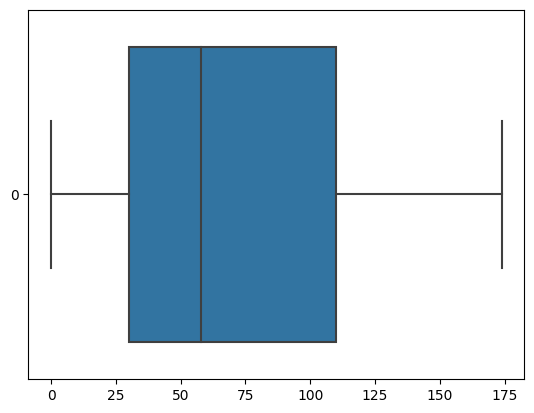

In [8]:
sns.boxplot(train_df['luxury_score'],orient='h')

In [9]:
print(train_df['luxury_score'].quantile(0.25))
print(train_df['luxury_score'].quantile(0.50))
print(train_df['luxury_score'].quantile(0.75))

30.0
58.0
110.0


In [10]:
def categorize_luxury(score):
    if 0 <= score < 30:
        return "Low"
    elif 30 <= score < 58:
        return "Normal"
    elif 58 <= score <= 110:
        return "semi_luxrious"
    elif score>110:
        return 'luxrious'
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [11]:
train_df['luxury']=train_df['luxury_score'].apply(categorize_luxury)

In [12]:
train_df['luxury'].value_counts()

luxury
semi_luxrious    953
Normal           937
Low              916
luxrious         903
Name: count, dtype: int64

In [13]:
train_df.head(5)

,price,bedRoom,bathroom,balcony,floorNum,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury
0,0.45,2.0,2.0,1,4.0,Relatively New,sector 7,flat,900.0,0,0,0,0,0,2,28,Low
1,0.50,2.0,2.0,1,1.0,Old Property,sector 3,flat,650.0,0,0,0,0,0,0,37,Normal
2,0.40,2.0,2.0,3,12.0,New Property,sohna road,flat,595.0,0,0,0,0,0,2,36,Normal
3,1.47,2.0,2.0,2,2.0,New Property,sector 61,flat,1200.0,1,0,0,0,0,2,76,semi_luxrious
4,0.70,2.0,2.0,3,5.0,Under Construction,sector 92,flat,1076.0,1,0,0,0,0,2,0,Low


<Axes: >

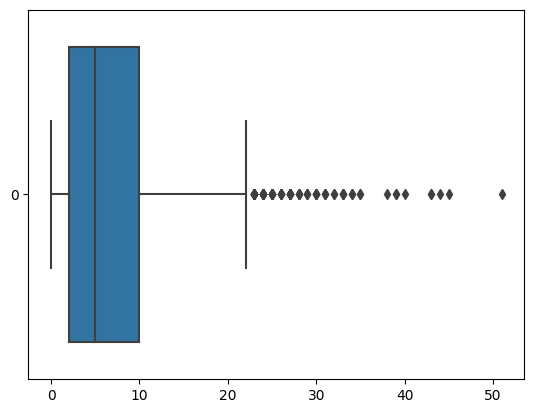

In [14]:
sns.boxplot(train_df['floorNum'],orient='h')

In [15]:
train_df['floorNum'].quantile(0.25)

2.0

<Axes: xlabel='floorNum', ylabel='Count'>

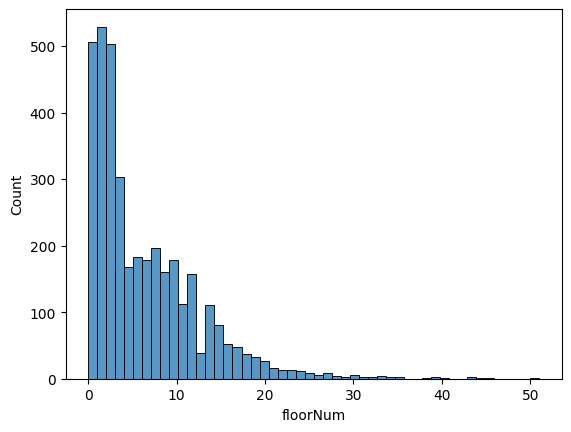

In [16]:
sns.histplot(train_df['floorNum'])

In [17]:
temp=train_df[train_df['floorNum']>15]

In [18]:
train_df['built_up_area'].quantile(0.90)

2841.0

In [19]:
train_df['built_up_area'].quantile(0.75)

1975.052

In [20]:
tt=temp[(temp['luxury']=='luxrious')&(temp['built_up_area']>2500)]

In [21]:
tt['floorNum']='hometop'

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_40089/109175259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt['floorNum']='hometop'


In [22]:
temp.update(tt)

In [23]:
temp.sample(5)

,price,bedRoom,bathroom,balcony,floorNum,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury
396,3.35,3.0,4.0,2,19.0,New Property,sector 108,flat,1658.32949,0,0,0,0,0,2,102,semi_luxrious
2182,1.00,2.0,2.0,3,23.0,New Property,sector 68,flat,1180.00000,0,0,0,0,0,2,49,Normal
1862,1.30,3.0,2.0,3,16.0,Moderately Old,sector 109,flat,1504.00000,0,0,0,0,0,2,134,luxrious
483,1.80,3.0,4.0,3,17.0,Relatively New,sector 102,flat,1511.20000,0,1,0,0,0,2,49,Normal
156,1.45,3.0,2.0,3+,20.0,Under Construction,sector 33,flat,86.00000,1,0,0,0,0,2,144,luxrious


In [24]:
temp.shape

(304, 17)

In [25]:
train_df.update(temp)

In [26]:
ter=train_df[train_df['floorNum']!='hometop']

In [27]:
ter.sample(5)

,price,bedRoom,bathroom,balcony,floorNum,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury
1065,1.05,3.0,4.0,3+,7.0,Relatively New,sector 104,flat,1800.0,0,1,0,0,0,0,96,semi_luxrious
749,6.50,4.0,5.0,3+,10.0,Relatively New,sector 53,flat,2500.0,1,1,0,1,0,0,174,luxrious
3266,0.70,4.0,3.0,2,3.0,Relatively New,dhankot,house,721.0,0,0,1,1,0,2,12,Low
1157,0.50,2.0,2.0,3,6.0,Relatively New,sector 81,flat,635.0,0,0,0,0,0,2,117,luxrious
1761,1.40,3.0,3.0,2,1.0,Relatively New,sector 69,flat,1262.4,0,0,0,0,0,2,95,semi_luxrious


<Axes: >

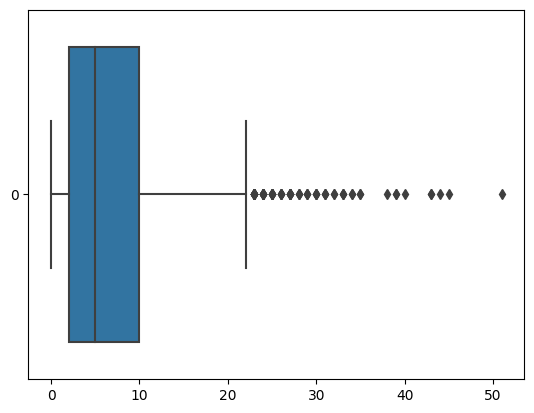

In [28]:
sns.boxplot(ter['floorNum'],orient='h')

In [29]:
print(ter['floorNum'].quantile(0.25))
print(ter['floorNum'].quantile(0.5))
print(ter['floorNum'].quantile(0.75))
print(ter['floorNum'].quantile(0.9))

2.0
5.0
10.0
14.0


In [30]:
def categorize_floor(floor):
    if floor==0:
        return 'groundfloor'
    if 0 < floor < 5:
        return "Low Floor"
    elif 5 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [31]:
ter['floorNum']=ter['floorNum'].apply(categorize_floor)

/var/folders/9h/szcjr1mj4c51q1_y7hpk6bvm0000gn/T/ipykernel_40089/926870377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ter['floorNum']=ter['floorNum'].apply(categorize_floor)


In [32]:
ter['floorNum'].value_counts()

floorNum
Low Floor      1708
Mid Floor      1064
High Floor      787
groundfloor     133
Name: count, dtype: int64

In [33]:
ter[ter['floorNum']=='groundfloor']['price'].describe()

count    133.000000
mean       1.567218
std        1.392942
min        0.130000
25%        0.740000
50%        1.200000
75%        1.900000
max        7.250000
Name: price, dtype: float64

In [34]:
ter[ter['floorNum']=='groundfloor']['built_up_area'].describe()

count     133.000000
mean     1458.793797
std      1030.951642
min        72.000000
25%       788.000000
50%      1262.400000
75%      1785.000000
max      8136.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='floorNum', ylabel='price'>

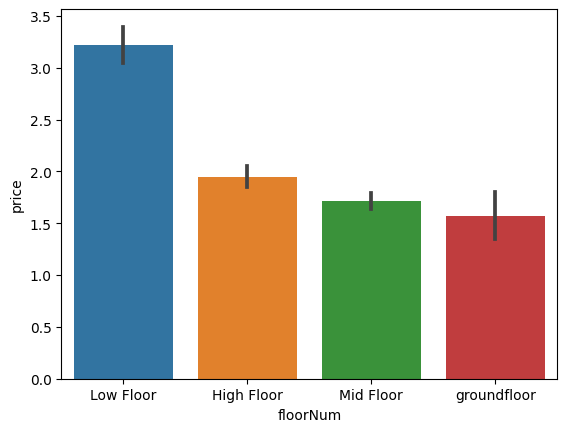

In [35]:
sns.barplot(data=ter,x='floorNum',y='price')

<Axes: xlabel='floorNum', ylabel='built_up_area'>

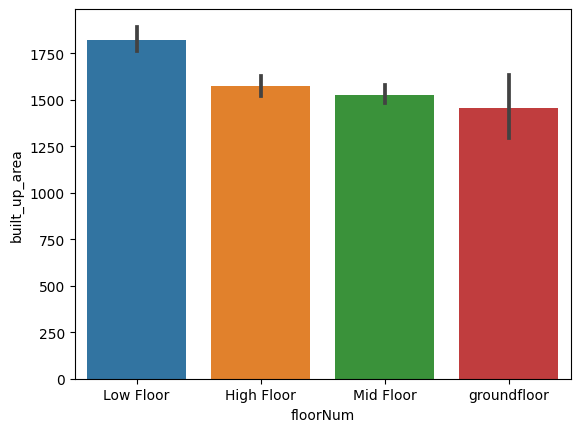

In [36]:
sns.barplot(data=ter,x='floorNum',y='built_up_area')

trend is same so this approch may be right

In [37]:
train_df.update(ter)

In [38]:
train_df['floorNum'].value_counts()

floorNum
Low Floor      1708
Mid Floor      1064
High Floor      787
groundfloor     133
hometop          17
Name: count, dtype: int64

<Axes: xlabel='floorNum', ylabel='price'>

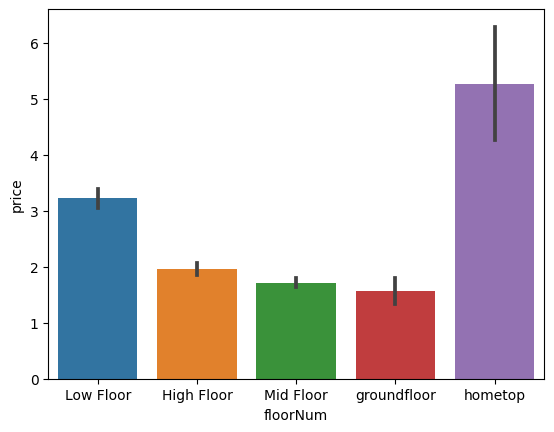

In [39]:
sns.barplot(data=train_df,x='floorNum',y='price')

In [40]:
train_df.sample(5)

,price,bedRoom,bathroom,balcony,floorNum,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury
710,1.15,2.0,2.0,3,High Floor,Relatively New,sector 88a,flat,1168.00,1,0,0,1,0,2,174,luxrious
3306,1.70,5.0,5.0,3,Low Floor,Moderately Old,sector 12,house,2001.36,0,0,0,1,1,2,9,Low
3282,0.75,3.0,1.0,0,Low Floor,New Property,sector 36,house,1076.00,0,0,0,0,0,2,0,Low
2549,1.05,3.0,3.0,3+,Mid Floor,Relatively New,sector 76,flat,1412.00,0,0,0,0,0,0,133,luxrious
1109,1.38,3.0,3.0,1,High Floor,Relatively New,sector 69,flat,1230.40,0,0,0,1,0,2,86,semi_luxrious


In [41]:
train_df.rename(columns={'floorNum':'floor_type'},inplace=True)

In [42]:
train_df.drop(columns='luxury_score',axis=1,inplace=True)

<Axes: xlabel='floor_type', ylabel='built_up_area'>

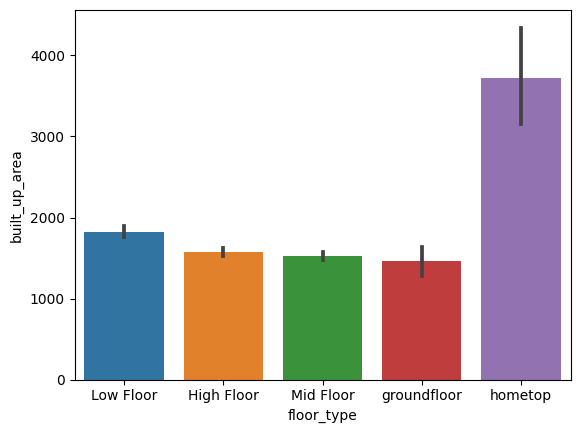

In [43]:
sns.barplot(data=train_df,x='floor_type',y='built_up_area')

In [44]:
''' balcony 3+ treat like a different category '''
train_df.columns
   

Index(['price', 'bedRoom', 'bathroom', 'balcony', 'floor_type',
       'agePossession', 'sector', 'type', 'built_up_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury'],
      dtype='object')

'''(floor_type ,agePossession, type, luxury) -->encoding
     floor_type-->ordinal encoding
      agepossesion-->            ,
      type-->one hot encoding
      luxury-->ordinal encoding'''

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Relatively New'),
  Text(1, 0, 'Old Property'),
  Text(2, 0, 'New Property'),
  Text(3, 0, 'Under Construction'),
  Text(4, 0, 'Moderately Old')])

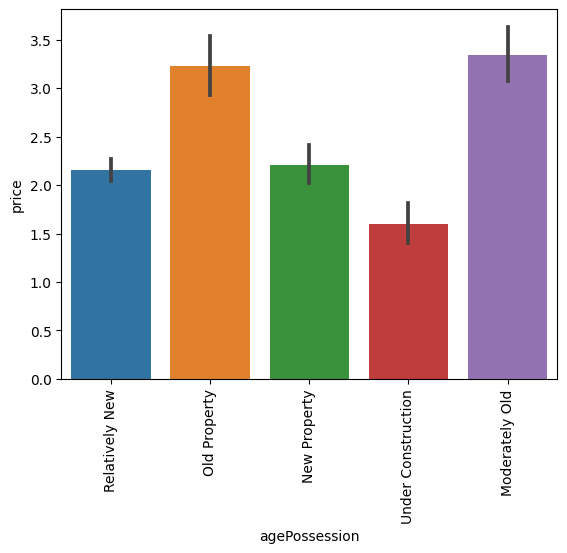

In [45]:
sns.barplot(data=train_df,x='agePossession',y='price')
plt.xticks(rotation=90)

<Axes: xlabel='balcony', ylabel='price'>

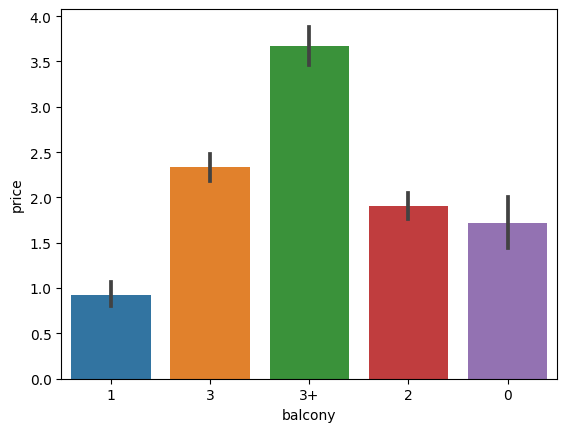

In [79]:
sns.barplot(data=train_df,x='balcony',y='price')

In [46]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [47]:
train_df.sample(5)

,price,bedRoom,bathroom,balcony,floor_type,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury
2118,1.15,2.0,2.0,3,Mid Floor,Relatively New,sector 103,flat,865.000000,1,0,0,0,0,0,luxrious
3285,1.75,4.0,4.0,0,High Floor,New Property,sector 76,house,2800.000000,0,0,0,0,0,2,Low
2129,0.26,2.0,2.0,1,Mid Floor,Relatively New,sohna road,flat,481.684525,0,0,0,0,0,2,semi_luxrious
105,0.80,2.0,2.0,2,Mid Floor,Under Construction,sector 89,flat,1297.000000,0,0,0,0,0,2,Normal
1879,0.63,2.0,2.0,3+,Low Floor,Relatively New,sector 82,flat,907.200000,1,0,0,0,0,2,semi_luxrious


In [70]:
train_df['floor_type']=train_df['floor_type'].str.lower()
train_df['luxury']=train_df['luxury'].str.lower()
train_df['balcony']=train_df['balcony'].astype(str)

In [71]:
train_df['floor_type'].unique()

array(['low floor', 'high floor', 'mid floor', 'groundfloor', 'hometop'],
      dtype=object)

In [72]:
train_df['luxury'].unique()

array(['semi_luxrious', 'normal', 'low', 'luxrious'], dtype=object)

In [73]:
data=train_df[['floor_type','agePossession','sector','type','luxury','balcony']]

In [74]:
train_df.head(5)

,price,bedRoom,bathroom,balcony,floor_type,agePossession,sector,type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury
0,0.95,2.0,1.0,1,low floor,Old Property,sector 28,flat,1069.0,0,0,0,0,0,2,semi_luxrious
1,1.45,3.0,5.0,3,high floor,Relatively New,sector 99a,flat,1597.6,0,1,0,0,1,0,normal
2,1.26,3.0,3.0,3,low floor,New Property,sector 37c,flat,965.0,0,0,0,0,0,2,low
3,2.20,3.0,4.0,3+,mid floor,Relatively New,sector 81,flat,1680.0,0,1,0,0,0,1,semi_luxrious
4,2.40,3.0,4.0,3+,high floor,Relatively New,sector 81,flat,1682.4,0,1,0,0,0,1,luxrious


In [80]:
data.shape

(3709, 6)

In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [96]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1', OrdinalEncoder(categories=[['groundfloor','mid floor','high floor','low floor','hometop']]), ['floor_type']),
    ('tnf2', OrdinalEncoder(), ['agePossession']),
    ('tnf3', OrdinalEncoder(), ['sector']),
    ('tnf4', OrdinalEncoder(), ['type']),
    ('tnf5', OrdinalEncoder(categories=[['low','normal','semi_luxrious','luxrious']]), ['luxury']),
    ('tnf6',OrdinalEncoder(categories=[['1','2','0','3','3+']]),['balcony'])]
)

In [97]:
transformer

ColumnTransformer(transformers=[('tnf1',
                                 OrdinalEncoder(categories=[['groundfloor',
                                                             'mid floor',
                                                             'high floor',
                                                             'low floor',
                                                             'hometop']]),
                                 ['floor_type']),
                                ('tnf2', OrdinalEncoder(), ['agePossession']),
                                ('tnf3', OrdinalEncoder(), ['sector']),
                                ('tnf4', OrdinalEncoder(), ['type']),
                                ('tnf5',
                                 OrdinalEncoder(categories=[['low', 'normal',
                                                             'semi_luxrious',
                                                             'luxrious']]),
                                 ['luxury']),
                                ('tnf6',
                                 OrdinalEncoder(categories=[['1', '2', '0', '3',
                                                             '3+']]),
                                 ['balcony'])])

In [107]:
train1_df=transformer.fit_transform(data)

In [108]:
train1_df=pd.DataFrame(train1_df,columns=data.columns)

In [109]:
train1_df

,floor_type,agePossession,sector,type,luxury,balcony
0,3.0,2.0,98.0,0.0,2.0,0.0
1,2.0,3.0,181.0,0.0,1.0,3.0
2,3.0,1.0,110.0,0.0,0.0,3.0
3,1.0,3.0,164.0,0.0,2.0,4.0
4,2.0,3.0,164.0,0.0,3.0,4.0
...,...,...,...,...,...,...
3704,1.0,3.0,175.0,0.0,0.0,3.0
3705,2.0,1.0,190.0,0.0,1.0,0.0
3706,2.0,3.0,145.0,0.0,2.0,1.0
3707,2.0,3.0,146.0,0.0,3.0,3.0


In [110]:
train_df.drop(columns=data.columns,axis=1,inplace=True)

In [112]:
train_df=pd.concat([train_df,train1_df],axis=1)

In [114]:
train_df.head(5)

,price,bedRoom,bathroom,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,floor_type,agePossession,sector,type,luxury,balcony
0,0.95,2.0,1.0,1069.0,0,0,0,0,0,2,3.0,2.0,98.0,0.0,2.0,0.0
1,1.45,3.0,5.0,1597.6,0,1,0,0,1,0,2.0,3.0,181.0,0.0,1.0,3.0
2,1.26,3.0,3.0,965.0,0,0,0,0,0,2,3.0,1.0,110.0,0.0,0.0,3.0
3,2.20,3.0,4.0,1680.0,0,1,0,0,0,1,1.0,3.0,164.0,0.0,2.0,4.0
4,2.40,3.0,4.0,1682.4,0,1,0,0,0,1,2.0,3.0,164.0,0.0,3.0,4.0


In [ ]:
train_df.to_csv('')